Found folder? True


C:\Users\Jacob\AppData\Local\Temp\ipykernel_47196\3913957109.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


CCD file
Saved: Z:\Jacob\Material CrPS4\Undoped\09102025 Linear Polarization with 45deg block\CCD Start\output\120K_HeNe_650SP_808LP_fiber_200umG2_5s_5cyc_900to1150nm_corr_cm.arc_data


C:\Users\Jacob\AppData\Local\Temp\ipykernel_47196\3913957109.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


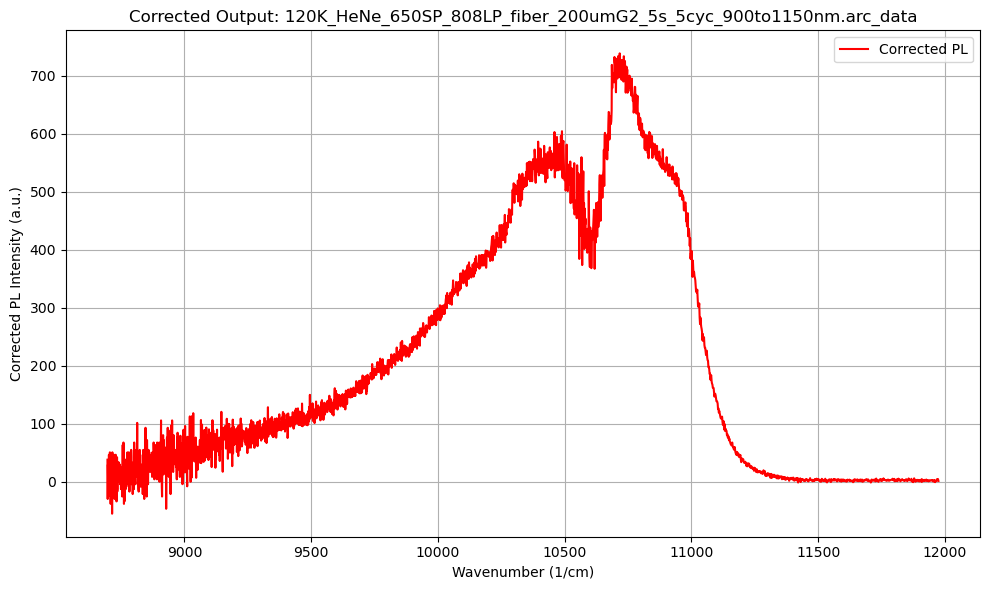

CCD file
Saved: Z:\Jacob\Material CrPS4\Undoped\09102025 Linear Polarization with 45deg block\CCD Start\output\16K_HeNe_650SP_808LP_fiber_200umG2_5s_5cyc_900to1150nm_corr_cm.arc_data


C:\Users\Jacob\AppData\Local\Temp\ipykernel_47196\3913957109.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


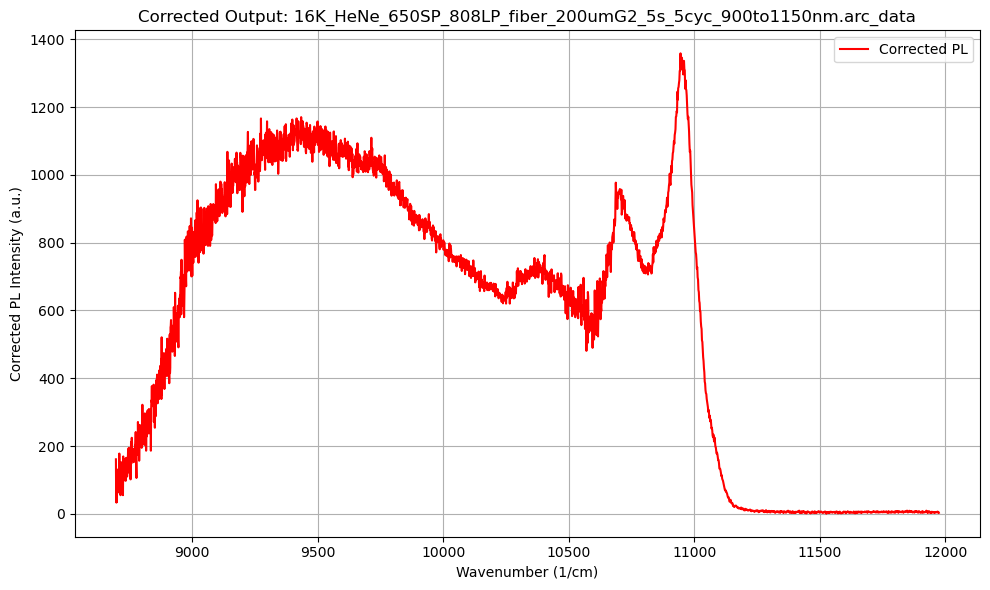

CCD file
Saved: Z:\Jacob\Material CrPS4\Undoped\09102025 Linear Polarization with 45deg block\CCD Start\output\30K_HeNe_650SP_808LP_fiber_200umG2_5s_5cyc_900to1150nm_corr_cm.arc_data


C:\Users\Jacob\AppData\Local\Temp\ipykernel_47196\3913957109.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


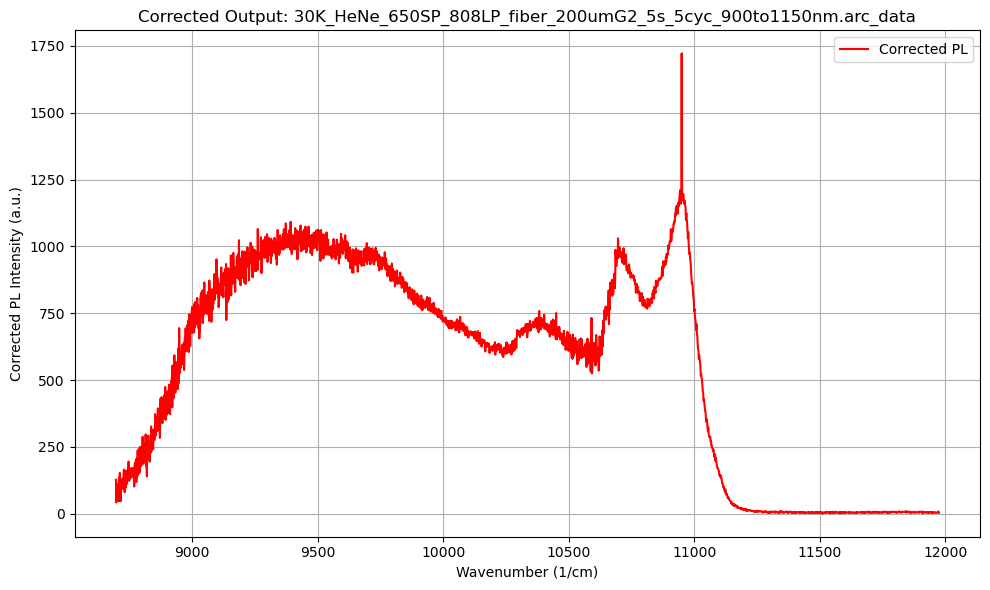

CCD file
Saved: Z:\Jacob\Material CrPS4\Undoped\09102025 Linear Polarization with 45deg block\CCD Start\output\4p12K_HeNe_650SP_808LP_fiber_200umG2_5s_5cyc_900to1150nm_corr_cm.arc_data


C:\Users\Jacob\AppData\Local\Temp\ipykernel_47196\3913957109.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


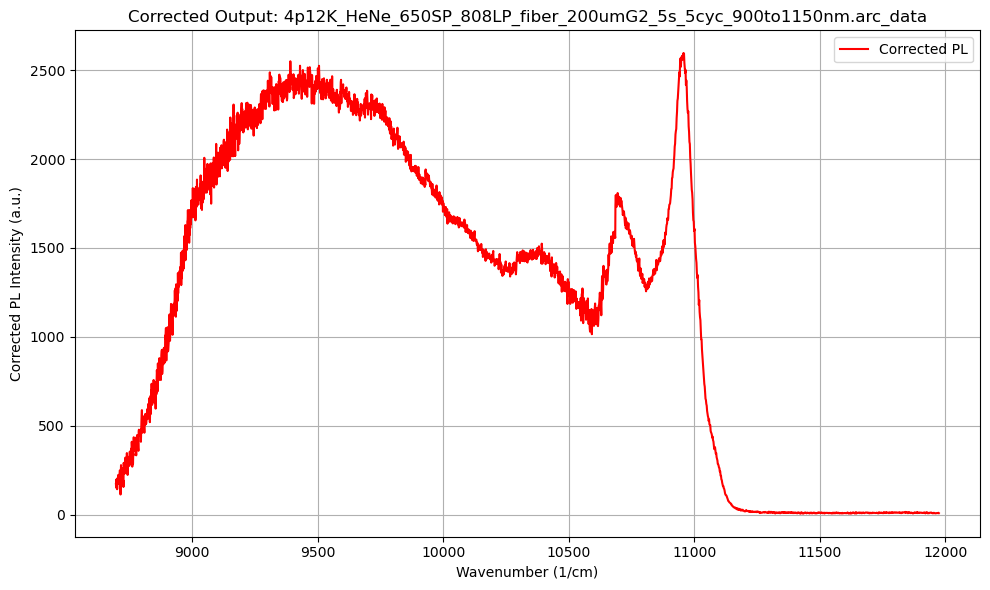

CCD file
Saved: Z:\Jacob\Material CrPS4\Undoped\09102025 Linear Polarization with 45deg block\CCD Start\output\4p13K_HeNe_650SP_808LP_fiber_200umG2_5s_5cyc_900to1150nm_corr_cm.arc_data


C:\Users\Jacob\AppData\Local\Temp\ipykernel_47196\3913957109.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


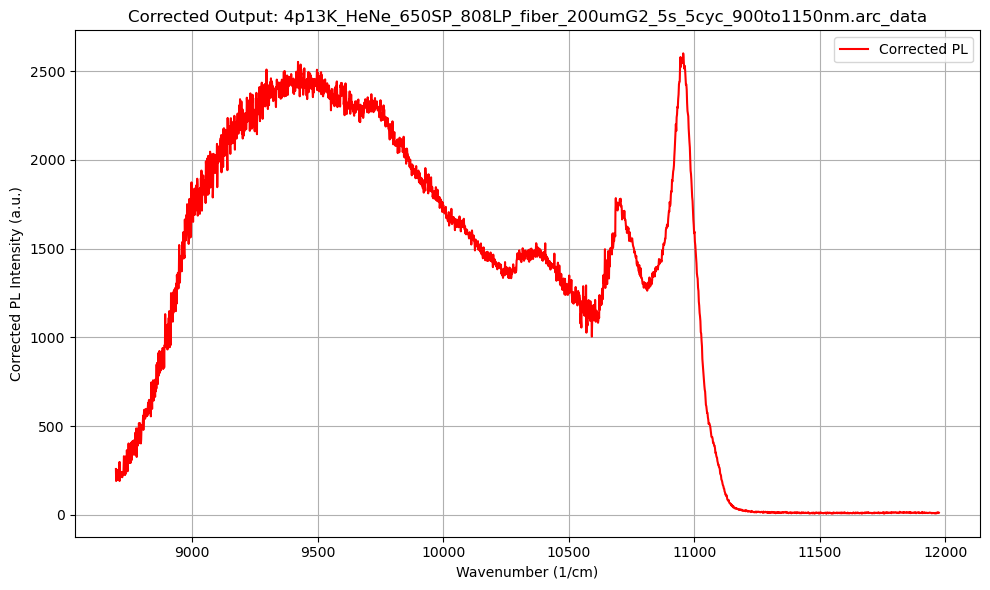

CCD file
Saved: Z:\Jacob\Material CrPS4\Undoped\09102025 Linear Polarization with 45deg block\CCD Start\output\4p4K_HeNe_650SP_808LP_fiber_100umG2_5s_5cyc_975nm_corr_cm.arc_data


C:\Users\Jacob\AppData\Local\Temp\ipykernel_47196\3913957109.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


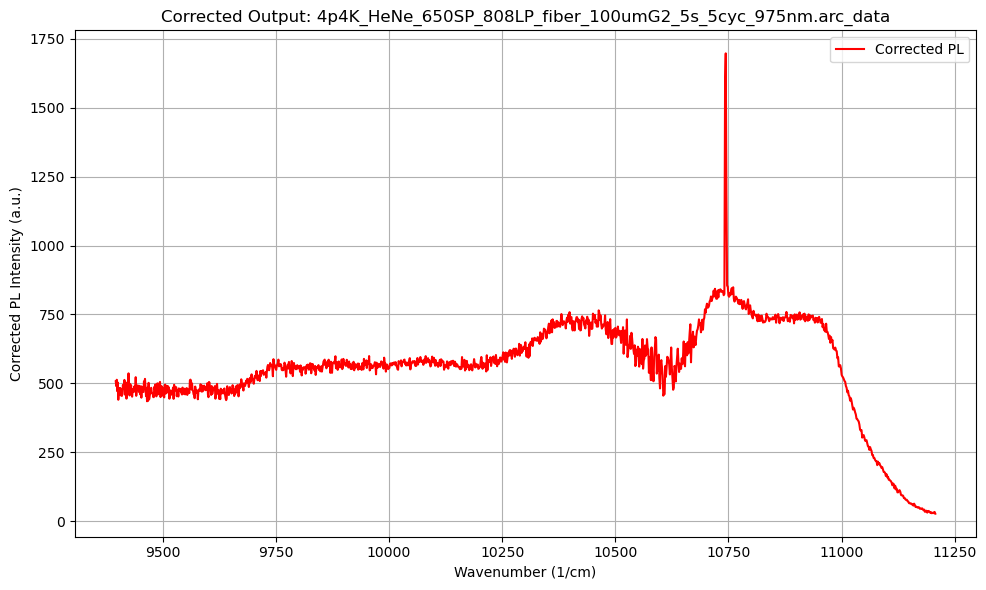

CCD file
Saved: Z:\Jacob\Material CrPS4\Undoped\09102025 Linear Polarization with 45deg block\CCD Start\output\4p4K_HeNe_650SP_808LP_fiber_200umG2_5s_5cyc_900to1150nm_corr_cm.arc_data


C:\Users\Jacob\AppData\Local\Temp\ipykernel_47196\3913957109.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


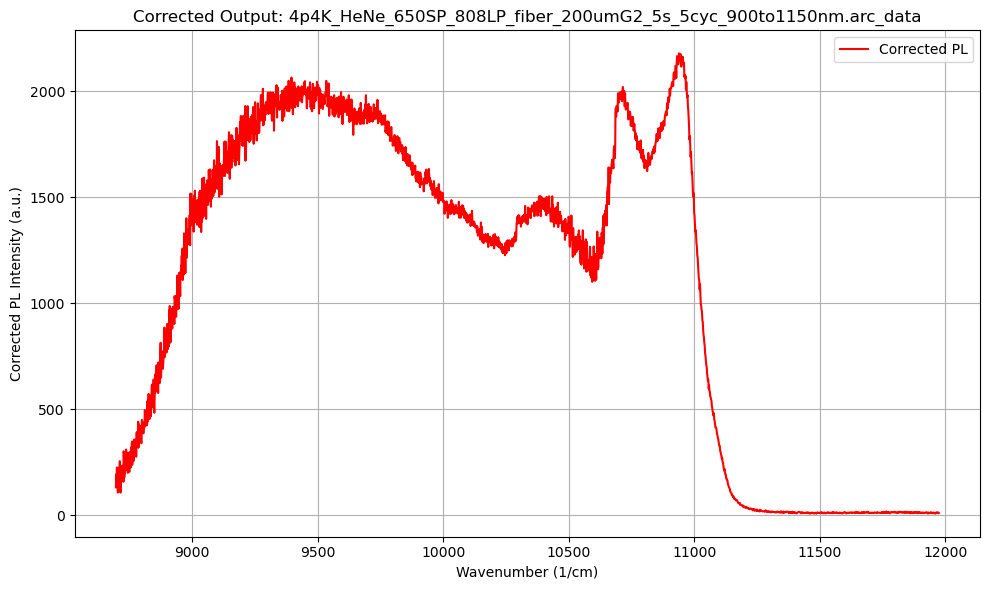

CCD file
Saved: Z:\Jacob\Material CrPS4\Undoped\09102025 Linear Polarization with 45deg block\CCD Start\output\50K_HeNe_650SP_808LP_fiber_200umG2_5s_5cyc_900to1150nm_corr_cm.arc_data


C:\Users\Jacob\AppData\Local\Temp\ipykernel_47196\3913957109.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


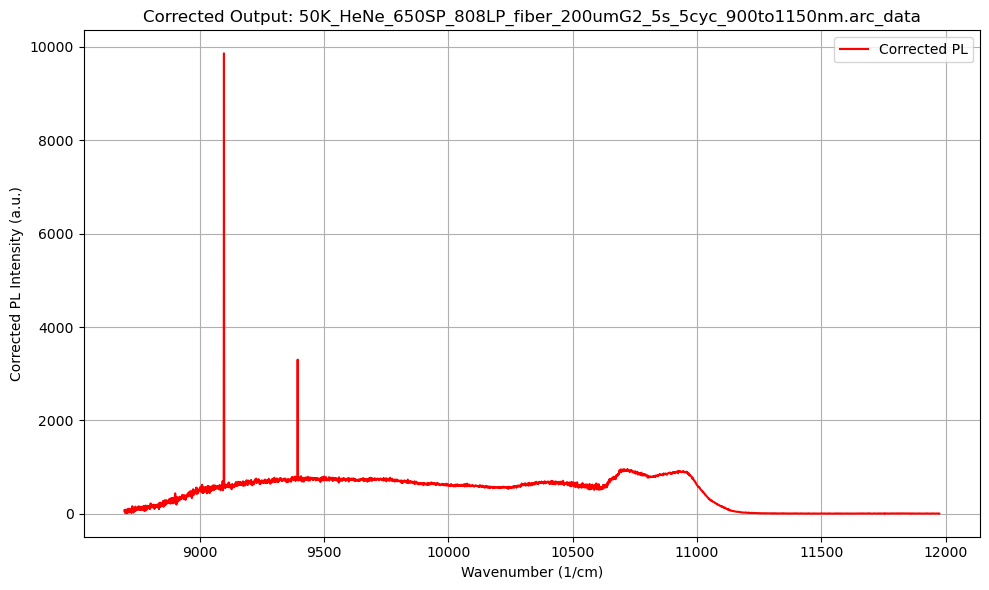

CCD file
Saved: Z:\Jacob\Material CrPS4\Undoped\09102025 Linear Polarization with 45deg block\CCD Start\output\80K_HeNe_650SP_808LP_fiber_200umG2_5s_5cyc_900to1150nm_corr_cm.arc_data


C:\Users\Jacob\AppData\Local\Temp\ipykernel_47196\3913957109.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


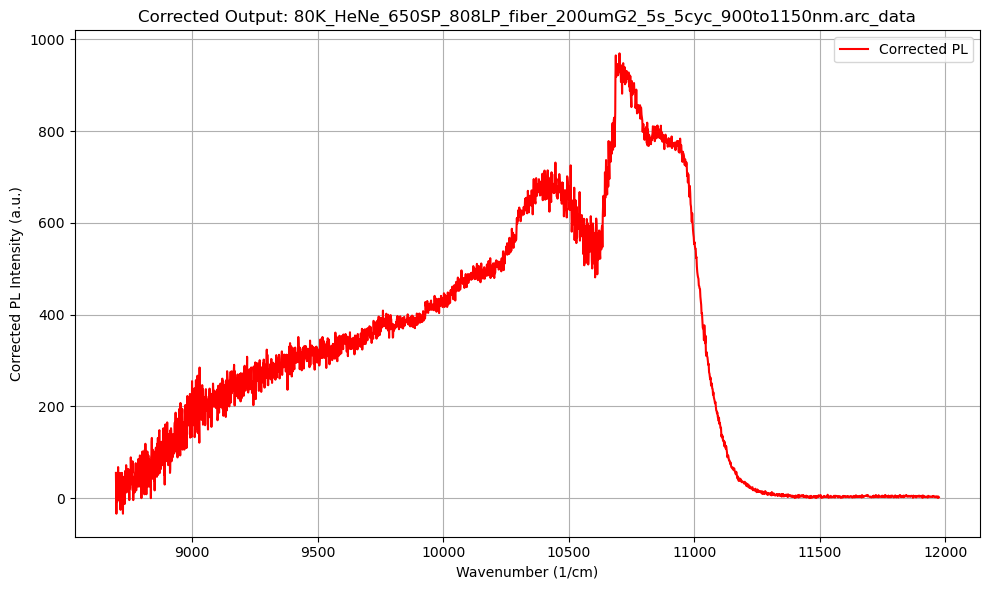

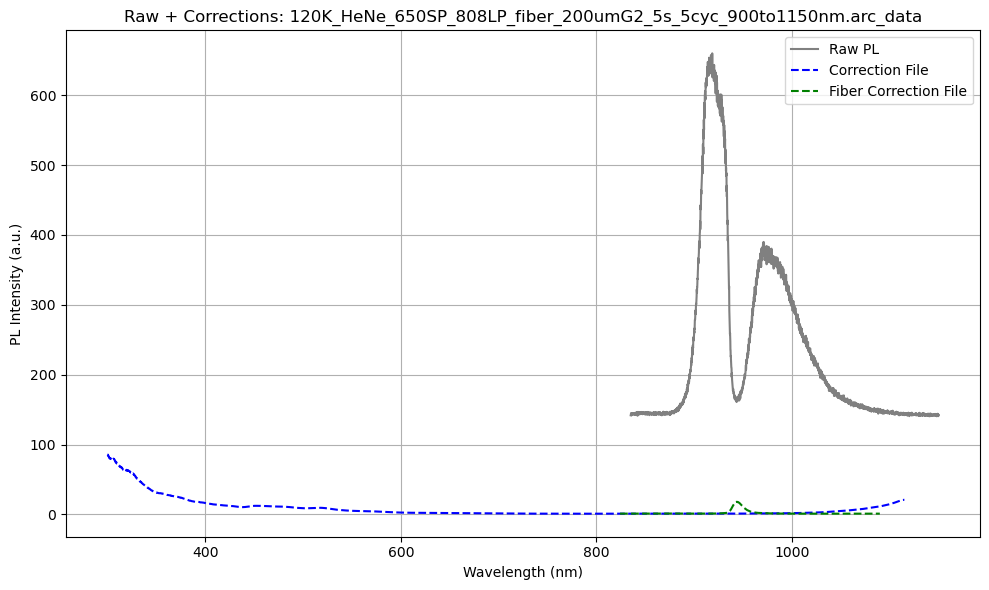

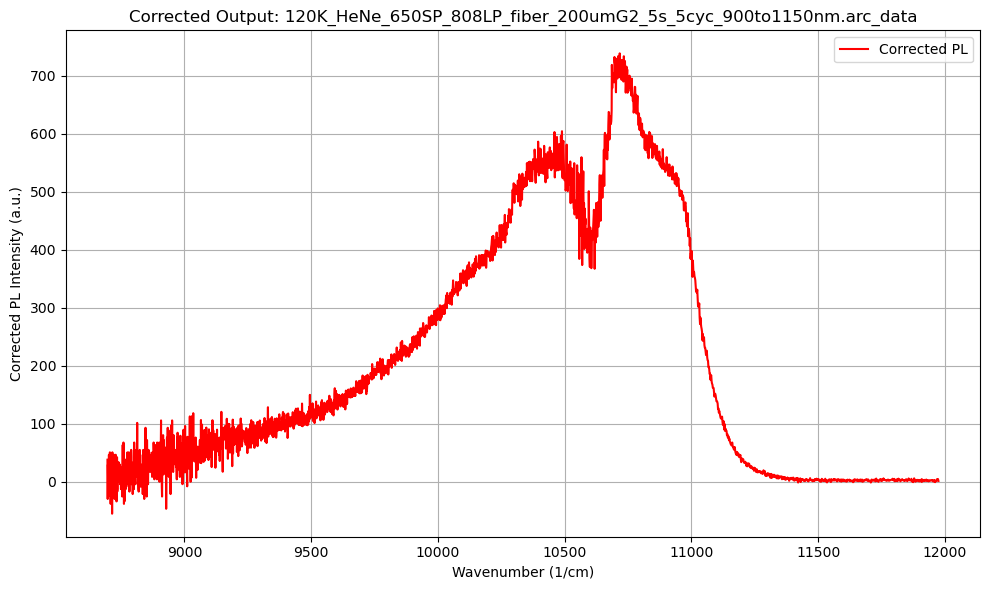

In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# ===== Paths to input folders and output folder =====
data_folder = r"Z:\Jacob\Material CrPS4\Undoped\09102025 Linear Polarization with 45deg block\CCD Start"
correction_file_path = r"Z:\Jacob\Correction Files\Downstairs PL table March 2024\G2_correction.csv"  # Path to the correction CSV file\
#correction_file_path = r"Z:\Jacob\Correction Files\Lamp_corr_halogen_old.csv"  # Path to the correction CSV file
fibercorrection_file_path = r"Z:\Jacob\Correction Files\Fiber for MCPL\Fiber correction.csv"  # Path to the Fiber correction CSV file
baseline_file_path = r"Z:\Jacob\Material CrPS4\Undoped\09102025 Linear Polarization with 45deg block\dark_808LP_fiber_200umG2_5s_5cyc_900to1150nm.arc_data"   # Path to the Baseline arcdata file
output_folder = os.path.join(data_folder, "output")
data_type = "CCD" # CCD or PMT
PMT_skiprows = 10
PL_type = "PL" #PL or PLE for jacobian correction (PLE doesn't need it)
os.makedirs(output_folder, exist_ok=True)

# ===== Baseline subtraction mode =====
# 0 = interpolate from baseline file
# 1 = subtract average from baseline file
# 2 = subtract user-specified constant
# 3 = subtract average of lowest N values in each data file
# 4 = interpolate from baseline file then subtract subtract average of lowest N values in each data file
baseline_mode = 0  # Change this value to choose mode
user_defined_baseline =  2260  # Used only if baseline_mode == 2
lowest_n_values = 20         # Used only if baseline_mode == 3

# ===== Enable or disable fiber correction =====
use_fiber_correction = True  # Set to False to skip applying the fiber correction

# ===== Enable or disable normalization =====
normalization_option = False

# Clear existing files in the output folder
for file in os.listdir(output_folder):
    file_path = os.path.join(output_folder, file)
    if os.path.isfile(file_path):
        os.remove(file_path)
print("Found folder?", os.path.exists(data_folder))

# Helper function to read data after the blank line
def read_CCD_file(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()
    # Find the first blank line
    blank_line_index = next(i for i, line in enumerate(lines) if line.strip() == "")
    # Read the data starting after the blank line
    data = pd.read_csv(
        filepath,
        delim_whitespace=True,
        skiprows=blank_line_index + 1,  # Skip lines up to and including the blank line
        header=None,
        names=["Wavelength", "PL"]
    )
    # Ensure columns are numeric
    data["Wavelength"] = pd.to_numeric(data["Wavelength"], errors="coerce")
    data["PL"] = pd.to_numeric(data["PL"], errors="coerce")
    # Drop rows with NaN values
    data.dropna(inplace=True)
    return data

def read_PMT_file(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()
    # Read the data
    data = pd.read_csv(
        filepath,
        sep='\t',
        skiprows=PMT_skiprows,  # 6 header + 1 column name line
        header=None,
        names=["Wavelength", "PL"]
    )
    # Ensure columns are numeric
    data["Wavelength"] = pd.to_numeric(data["Wavelength"], errors="coerce")
    data["PL"] = pd.to_numeric(data["PL"], errors="coerce")
    # Drop rows with NaN values
    data.dropna(inplace=True)
    return data

# Load baseline file
baseline_data = read_CCD_file(baseline_file_path)

# Load correction file from CSV (skip the first row)
correction_data = pd.read_csv(correction_file_path, skiprows=1, header=None, names=["Wavelength", "PL"])

# Load fiber correction file from CSV (skip the first row)
fiber_correction_data = pd.read_csv(fibercorrection_file_path, skiprows=1, header=None, names=["Wavelength", "PL"])

# Ensure columns are numeric
correction_data["Wavelength"] = pd.to_numeric(correction_data["Wavelength"], errors="coerce")
correction_data["PL"] = pd.to_numeric(correction_data["PL"], errors="coerce")
# Drop rows with NaN values
correction_data.dropna(inplace=True)

# Load data file
#data = read_CCD_file(data_file)

first_data_filename = None
first_raw_data = None
first_corrected_data = None
# Process each data file in the folder (excluding the baseline file)
for filename in os.listdir(data_folder):
    input_path = os.path.join(data_folder, filename)
    if os.path.isfile(input_path):
        if data_type == "CCD":
            print ("CCD file")
            data = read_CCD_file(input_path)
        if data_type == "PMT":
            print ("PMT file")
            data = read_PMT_file(input_path)
            
        if first_data_filename is None:
            first_data_filename = filename
            first_raw_data = data.copy()
    
        # Interpolate corrections to match data wavelengths
        correction_interp = np.interp(
            data["Wavelength"].values.astype(float),
            correction_data["Wavelength"].values.astype(float),
            correction_data["PL"].values.astype(float)
        )
        if use_fiber_correction:
            fiber_correction_interp = np.interp(
                data["Wavelength"].values.astype(float),
                fiber_correction_data["Wavelength"].values.astype(float),
                fiber_correction_data["PL"].values.astype(float)
            )
        else:
            fiber_correction_interp = np.ones_like(data["Wavelength"].values)
    
    
        # Subtract baseline using selected mode
        if baseline_mode == 0:
            # Interpolated baseline subtraction
            interpolated_baseline = np.interp(
                data["Wavelength"].values.astype(float),
                baseline_data["Wavelength"].values.astype(float),
                baseline_data["PL"].values.astype(float)
            )
            data["PL"] -= interpolated_baseline
    
        elif baseline_mode == 1:
            # Average baseline PL value subtraction
            avg_baseline_PL = baseline_data["PL"].mean()
            data["PL"] -= avg_baseline_PL
    
        elif baseline_mode == 2:
            # Subtract user-defined constant
            data["PL"] -= user_defined_baseline
    
        elif baseline_mode == 3:
            # Subtract average of lowest N values from the current data
            sorted_pl = np.sort(data["PL"].values)
            avg_lowest_n = np.mean(sorted_pl[:lowest_n_values])
            data["PL"] -= avg_lowest_n

        elif baseline_mode == 4:
            # Interpolate from baseline file then subtract subtract average of lowest N values in each data file
            interpolated_baseline = np.interp(
                data["Wavelength"].values.astype(float),
                baseline_data["Wavelength"].values.astype(float),
                baseline_data["PL"].values.astype(float)
            )
            data["PL"] -= interpolated_baseline
            sorted_pl = np.sort(data["PL"].values)
            avg_lowest_n = np.mean(sorted_pl[:lowest_n_values])
            data["PL"] -= avg_lowest_n
    
        # Apply corrections
        data["PL"] *= correction_interp
        data["PL"] *= fiber_correction_interp
    
        # Convert to X_cm and update PL scale
        data["X_cm"] = 10000000 / data["Wavelength"]
        if PL_type == "PLE":
            data["PL"] = (data["PL"] * data["Wavelength"] ** 2) / 10000000
    
        #Normalize
        if normalization_option:
            norm_factor = sum(data["PL"])
            data["PL"]/=norm_factor
            
        # Save corrected data
        output_file = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_corr_cm.arc_data")
        data[["X_cm", "PL"]].to_csv(output_file, sep="\t", index=False, header=False)
        print(f"Saved: {output_file}")
    
        if filename == first_data_filename:
            first_corrected_data = data.copy()

        plt.figure(figsize=(10, 6))
        plt.plot(data["X_cm"], data["PL"], label="Corrected PL", color='red')
    
        plt.xlabel("Wavenumber (1/cm)")
        plt.ylabel("Corrected PL Intensity (a.u.)")
        plt.title(f"Corrected Output: {filename}")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# --- PLOT 1: Raw data with correction and fiber correction files ---
if first_raw_data is not None:
    plt.figure(figsize=(10, 6))
    plt.plot(first_raw_data["Wavelength"], first_raw_data["PL"], label="Raw PL", color='gray')
    plt.plot(correction_data["Wavelength"], correction_data["PL"], label="Correction File", linestyle="--", color='blue')
    plt.plot(fiber_correction_data["Wavelength"], fiber_correction_data["PL"], label="Fiber Correction File", linestyle="--", color='green')
    #plt.xlim(800, 950)
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("PL Intensity (a.u.)")
    plt.title(f"Raw + Corrections: {first_data_filename}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- PLOT 2: Final corrected output data ---
if first_corrected_data is not None:
    plt.figure(figsize=(10, 6))
    plt.plot(first_corrected_data["X_cm"], first_corrected_data["PL"], label="Corrected PL", color='red')

    plt.xlabel("Wavenumber (1/cm)")
    plt.ylabel("Corrected PL Intensity (a.u.)")
    plt.title(f"Corrected Output: {first_data_filename}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()